# Machine Learning - Mini Project 1 Solutions
## PPHA 30545 - Professor Clapp
### Winter 2023


In [61]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [62]:
acs_data = pd.read_csv('usa_00001.csv')

## 3. Preparing the data 
### 3.1. Familiarizing with the data

In [63]:
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2021,202101,1902,2021010114983,5304.0,2021000019021,160001,4,1,5304.0,...,100,0,0,7,71,1,10,10000,1,11
1,2021,202101,2994,2021000021366,25116.0,2021000029941,270201,1,2,29172.0,...,200,0,0,6,63,1,10,1000,1,11
2,2021,202101,3150,2021000032187,14664.0,2021000031501,100001,1,1,14664.0,...,100,0,0,6,63,1,10,21000,1,11
3,2021,202101,3306,2021000042884,2964.0,2021000033061,250001,1,1,3120.0,...,200,0,0,4,40,1,10,24000,1,11
4,2021,202101,3618,2021000063494,13260.0,2021000036181,130301,1,1,13104.0,...,100,0,0,11,114,1,10,85000,1,11


In [64]:
acs_data.describe()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
count,8556.0,8556.0,8.556000e+03,8.556000e+03,8556.000000,8.556000e+03,8.556000e+03,8556.000000,8556.000000,8556.000000,...,8556.000000,8556.000000,8556.000000,8556.000000,8556.000000,8556.0,8556.000000,8556.000000,8556.000000,8556.000000
mean,2021.0,202101.0,7.208495e+05,2.021001e+12,16262.124825,2.021007e+12,4.677905e+05,1.063114,1.694016,16624.410940,...,261.667017,0.326905,34.298621,7.886746,81.183263,1.0,10.080295,60561.317204,1.041608,11.401823
std,0.0,0.0,4.206382e+05,1.391498e+06,13530.554382,4.206382e+06,9.381907e+05,0.427287,0.953687,13964.445118,...,268.836697,0.913734,98.078562,2.352989,23.529964,0.0,0.491879,74458.147968,0.199704,1.803708
min,2021.0,202101.0,1.902000e+03,2.021000e+12,312.000000,2.021000e+12,1.000100e+04,1.000000,1.000000,156.000000,...,100.000000,0.000000,0.000000,0.000000,2.000000,1.0,10.000000,0.000000,1.000000,11.000000
25%,2021.0,202101.0,3.517320e+05,2.021000e+12,7956.000000,2.021004e+12,9.001700e+04,1.000000,1.000000,8112.000000,...,100.000000,0.000000,0.000000,6.000000,63.000000,1.0,10.000000,20000.000000,1.000000,11.000000
50%,2021.0,202101.0,7.195800e+05,2.021001e+12,12480.000000,2.021007e+12,2.200270e+05,1.000000,1.000000,12792.000000,...,100.000000,0.000000,0.000000,7.000000,71.000000,1.0,10.000000,42000.000000,1.000000,11.000000
75%,2021.0,202101.0,1.090470e+06,2.021001e+12,19968.000000,2.021011e+12,4.103360e+05,1.000000,2.000000,20280.000000,...,359.000000,0.000000,0.000000,10.000000,101.000000,1.0,10.000000,75000.000000,1.000000,11.000000
max,2021.0,202101.0,1.440846e+06,2.021010e+12,175968.000000,2.021014e+12,5.930851e+06,4.000000,9.000000,175812.000000,...,990.000000,4.000000,498.000000,11.000000,116.000000,1.0,15.000000,682000.000000,2.000000,20.000000


### 3.2. For our analysis, we'll need to use the codebook we saved to clean and create a few variables:
#### a) Education

In [65]:
# Create a continuous education variable
crosswalk = pd.read_csv('PPHA_30545_MP01-Crosswalk')
crosswalk = crosswalk.set_index('educd').T

acs_data['EDUCDC'] = acs_data['EDUCD']
acs_data = acs_data.replace({'EDUCDC': crosswalk})

#### b) Dummy variables

In [66]:
# i. High school diploma
acs_data['hsdip'] = ((acs_data['EDUCDC'] >= 12) & (acs_data['EDUCDC'] < 16)).astype(int)
# ii. College degree
acs_data['coldip'] = (acs_data['EDUCDC'] >= 16).astype(int)
# iii. white
acs_data['White'] = np.where(acs_data['RACE'] == 1, 1, 0)
# iv. black
acs_data['Black'] = np.where(acs_data['RACE'] == 2, 1, 0)
# v. hispanic
acs_data['hispanic'] = ((acs_data['HISPAN'] != 0) & (acs_data['HISPAN'] != 9)).astype(int)
# vi. married
acs_data['married'] = ((acs_data['MARST'] == 1) | (acs_data['MARST'] == 2)).astype(int)
# vii. female
acs_data['female'] = (acs_data['SEX'] == 2).astype(int)
# viii. veteran
acs_data['VET'] = np.where(acs_data['VETSTAT'] == 2, 1, 0)

#### c) Interaction terms

In [67]:
for var in ['hsdip', 'coldip']:
    acs_data[var + '_inter_educdc'] = acs_data[var]*acs_data['EDUCDC']

#### d) Create the following

In [68]:
# Drop observations with zero income wage
incwage_zero_index = acs_data[acs_data['INCWAGE'] == 0].index
acs_data.drop(incwage_zero_index, inplace=True)

In [69]:
# i. Age squared
acs_data['AGE_SQ'] = np.power(acs_data['AGE'], 2)
# ii. log of income
acs_data['INCWAGE_log'] = np.log(acs_data['INCWAGE'])

## 4. Data Analysis
### 1. Compute descriptive statistics

In [70]:
acs_data[["YEAR", "INCWAGE", "INCWAGE_log", 'EDUCDC', 'female', 'AGE', 'AGE_SQ',
          'White', 'Black', 'hispanic', 'married', 'NCHILD', 'VET', 'hsdip', 'coldip']].describe()

,YEAR,INCWAGE,INCWAGE_log,EDUCDC,female,AGE,AGE_SQ,White,Black,hispanic,married,NCHILD,VET,hsdip,coldip
count,8143.0,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,2021.0,63632.890826,10.561771,14.231610,0.481027,41.526096,1898.076753,0.663269,0.081051,0.162348,0.533833,0.823898,0.041754,0.541815,0.406607
std,0.0,75031.705812,1.133858,3.023473,0.499671,13.178825,1104.537492,0.472621,0.272931,0.368792,0.498885,1.151690,0.200038,0.498279,0.491230
min,2021.0,30.000000,3.401197,0.000000,0.000000,18.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,24000.000000,10.085809,12.000000,0.000000,31.000000,961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.0,45000.000000,10.714418,14.000000,0.000000,42.000000,1764.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2021.0,76000.000000,11.238489,16.000000,1.000000,53.000000,2809.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
max,2021.0,682000.000000,13.432785,22.000000,1.000000,65.000000,4225.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000


### 2. Scatter plot

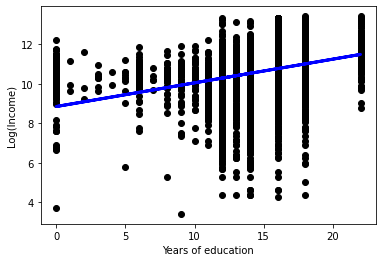

In [71]:
 lm_simple = lm().fit(acs_data[['EDUCDC']], acs_data[['INCWAGE_log']])
 simple_y_pred = lm_simple.predict(acs_data[['EDUCDC']])
 plt.scatter(acs_data[['EDUCDC']], acs_data[['INCWAGE_log']], color="black")
 plt.plot(acs_data[['EDUCDC']], simple_y_pred, color="blue", linewidth=3)
 plt.xlabel('Years of education')
 plt.ylabel('Log(Income)')

 plt.show()

### 3. Estimate the model

In [72]:
result = smf.ols('INCWAGE_log ~ EDUCDC + female + AGE + AGE_SQ + White + Black + hispanic + married + NCHILD + VET', data = acs_data)
print(result.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     321.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -11222.
No. Observations:                8143   AIC:                         2.247e+04
Df Residuals:                    8132   BIC:                         2.254e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6989      0.126     45.295      0.0

(a) What fraction of the variation in log wages does the model explain?

Answer: *The value of the R squared: 0.264*

(b) Test the hypothesis that [...]:

Answer: *This hypothesis is being tested in the default summary under the F-statistic and Prob(F-Statistic). In this case, the p-value is zero. Therefore, we can reject the null at the 90, 95 and 99% of confidence.*

(c) What is the return to an additional year of education? Is this statistically significant? Is it practically significant? Briefly explain

Answer *The coefficient of years of education is 0.0903. Since the dependent variable is in logs, an additional year of education is associated with an increase of about 9.45% (= e<sup>0.0903</sup> −1) in income.*

(d) At what age does the model predict an individual will achieve the highest wage?

Answer: *Let's take the derivative of Age*

        d(ols)/d(AGE) = 0.1571 + 2 * - 0.0016 * AGE
        d(ols)/d(AGE) = 0.1571 - 0.0032 * AGE

*Since we know that our function is concave, our max will be located whenever the derivative is equal to zero. In other words:*

        0 = 0.1571 - 0.0032 * AGE
        0.0032 * AGE = 0.1571
        AGE = 0.1571/0.0032 = 49.09

*Another way is the brute-force way:*

In [73]:
highest_income = 0
for current_age in range(100):
    # Current income for age = current_age
    current_income = 0.1571 - 0.0032*current_age
    if highest_income > current_income:
        print("Age with highest income:", current_age - 1)
        break

Age with highest income: 49


*Doesn't work with decimals but it's not so bad*

(e) Does the model predict that men or women will have higher wages, all else equal? Briefly explain why we might observe this pattern in the data

*The female coefficient is negative. This suggests women earn about 30% less than men*

*All else in the model equal, women earn 70.5% of what men earn since 100(e<sup>-0.3496</sup>-1)  is roughly -29.5%. There are many factors left out of the model such as occupational choice, preference over leisure, and willingness to negotiate compensation. However, the model’s result of women earning less than men with all other attributes of the model being equal is consistent with studies that control for much more and still find women earning less than men albeit to a lesser degree.*

(f) Interpret the coefficients on the white and black, and its significance

*First, it’s important to establish the baseline group for comparison. The baseline group consists of people who either did not check any of the boxes or do not identify as white, black, or Hispanic. So compared to this baseline group, a person from a particular demographic J earns 100(e<sup>βJ</sup>-1) of what a baseline group member would earn with all else in the model equal. So all else in the model equal, a white person earns 103.33% (e<sup>0.0328</sup>-1=3.33%) of what a baseline group member earns. For a black person, it’s 82.73% 100(e<sup> -0.1896 </sup>-1=-17.27%).*

*Only the estimate for black is statistically significant, associated p-value is 0.00*

### 4. Graph

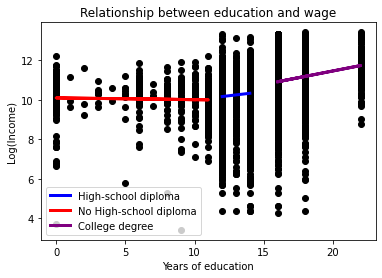

In [74]:
def get_reg_line(data, line_color, label):
    '''
    Get scatter plot with fitted OLS regression line
    Input: data- data frame
    line_color(str)- string for line color
    label(str)- line label name
    Output: Plot
    '''
    y = data[['INCWAGE_log']].values
    X = data[['EDUCDC' ]].values
    y_pred = lm().fit(X, y).predict(X)

    return plt.plot(X, y_pred, color= line_color, linewidth=3, label = label)



plt.scatter(acs_data[['EDUCDC']], acs_data[["INCWAGE_log"]], color="black")
get_reg_line(acs_data[acs_data['hsdip'] == 1], "blue", "High-school diploma")
get_reg_line(acs_data[acs_data['EDUCDC'] < 12], "red", "No High-school diploma")
get_reg_line(acs_data[acs_data['coldip'] == 1], "purple", "College degree")
plt.xlabel('Years of education')
plt.title('Relationship between education and wage')
plt.legend()
plt.ylabel('Log(Income)')
plt.show()

### 5. 

Answer: *There are many ways to modify the model. One such way is to allow (i) different intercepts for the three groups (no degree, high school degree, college degree) and (ii) different slopes for the three groups. That is,*

ln(incwage) = β0+γ<sub>1</sub>hsdip+γ<sub>2</sub>coldip+γ<sub>3</sub>hsdip·educdc+γ<sub>4</sub>coldip·educdc+...

*where hsdip and coldip are indicator functions for whether an individual is a high school graduate or a college graduate. In the ellipsis are controls from the original model as well as the error term*

### 6. Estimate the model you proposed in the previous question and report your results. 

In [75]:
result = smf.ols('INCWAGE_log ~ hsdip + coldip + EDUCDC + hsdip_inter_educdc + coldip_inter_educdc + female + AGE + AGE_SQ + White + Black + hispanic + married + NCHILD + VET', data = acs_data)
print(result.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     250.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -11115.
No. Observations:                8143   AIC:                         2.226e+04
Df Residuals:                    8128   BIC:                         2.236e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7842    

*(a) What fraction of the variation in log wages does the model explain? How does this  compare to the model you estimated in question 3?*

*The variation in the log of wages explained by the model is $R^2 = 0.286$, this is greater than the $R^2=0.264$ of the model estimated in question 3.*

*(b) Predict the wages of an 22 year old, female individual (who is neither white, black, nor Hispanic, is not married, has no children, and is not a veteran) with a high school diploma and an all else equal individual with a college diploma. Assume that it takes someone 12 years to graduate high school and 16 years to graduate college.*

*The predicted wages for an with individual with that characteristics and a HS degree are approximately $10,911.87, while the predicted wages for an individual with a college degree are approximately $18,924.54*

In [76]:
# High School degree
dict_hs = {'female': [1], 'AGE' : [22] ,'AGE_SQ' : [484], 'hsdip': [1], 'coldip':[0],
 'Black': [0], 'hispanic':[0], 'NCHILD': [0], 'married': [0], 'VET':[0], 'EDUCDC':[12], 
 'hsdip_inter_educdc': [12], 'coldip_inter_educdc': [0], 'White': [0]}
df_pred = pd.DataFrame(data=dict_hs)
prediction1 = result.fit().get_prediction(df_pred)
prediction1 = prediction1.summary_frame(alpha=0.05)
prediction1_wage = np.exp(prediction1['mean'].values[0])
print(f'Wage with HS degree: {prediction1_wage}')

# College degree
dict_cd = {'female': [1], 'AGE' : [22] ,'AGE_SQ' : [484], 'hsdip': [0], 'coldip':[1],
 'Black': [0], 'hispanic':[0], 'NCHILD': [0], 'married': [0], 'VET':[0], 'EDUCDC':[16], 
 'hsdip_inter_educdc': [0], 'coldip_inter_educdc': [16], 'White': [0]}
df_pred = pd.DataFrame(data=dict_cd)
prediction2 = result.fit().get_prediction(df_pred)
prediction2 = prediction2.summary_frame(alpha=0.05)
prediction2_wage = np.exp(prediction2['mean'].values[0])
print(f'Wage with college degree: {prediction2_wage}')

Wage with HS degree: 9772.042974449947
Wage with college degree: 18411.02083136736


*(c) The President is concerned that citizens will be harmed (and voters unhappy) if the predictions from your model turn out to be wrong. She wants to know how confident you are in your predictions. Briefly explain.*


*Open-ended question. Full credit if explanation is based on the strengths or weaknesses of the model or the estimation results.*



### 7. There are many ways that this model could be improved. How would you do things differently if you were asked to predict the returns to education given the data available (without any other stipulations)? Try fitting some different models and report the results of the model that best predicts log wages that you can come up with. Use adjusted R2 as your measure of the model that produces the best prediction.

In [77]:
# Examining all columns
acs_data.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'SEX', 'AGE', 'MARST',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'EMPSTAT',
       'EMPSTATD', 'INCWAGE', 'VETSTAT', 'VETSTATD', 'EDUCDC', 'hsdip',
       'coldip', 'White', 'Black', 'hispanic', 'married', 'female', 'VET',
       'hsdip_inter_educdc', 'coldip_inter_educdc', 'AGE_SQ', 'INCWAGE_log'],
      dtype='object')

In [78]:
# Model 1
model1 = smf.ols('INCWAGE_log ~ hsdip + coldip', data=acs_data).fit() 
print("Adjusted R2 for model: ", model1.rsquared_adj)
print(model1.summary())

Adjusted R2 for model:  0.12647115702715728
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     590.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          3.67e-240
Time:                        14:11:46   Log-Likelihood:                -12025.
No. Observations:                8143   AIC:                         2.406e+04
Df Residuals:                    8140   BIC:                         2.408e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

In [79]:
# Model 2
model2 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black', data=acs_data).fit() 
print("Adjusted R2 for model: ", model2.rsquared_adj)
print(model2.summary())

Adjusted R2 for model:  0.16554784386963584
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     324.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.81e-317
Time:                        14:11:46   Log-Likelihood:                -11838.
No. Observations:                8143   AIC:                         2.369e+04
Df Residuals:                    8137   BIC:                         2.373e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

In [80]:
# Model 3
model3 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black + EDUCDC', data=acs_data).fit() 
print("Adjusted R2 for model: ", model3.rsquared_adj)
print(model3.summary())

Adjusted R2 for model:  0.1731113322827299
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     285.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -11800.
No. Observations:                8143   AIC:                         2.361e+04
Df Residuals:                    8136   BIC:                         2.366e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

In [81]:
# Model 4
model4 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black + AGE_SQ ', data=acs_data).fit() 
print("Adjusted R2 for model: ", model4.rsquared_adj)
print(model4.summary())

Adjusted R2 for model:  0.2135158001352515
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     369.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -11596.
No. Observations:                8143   AIC:                         2.321e+04
Df Residuals:                    8136   BIC:                         2.326e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

In [82]:
# Model 5
model5 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black + AGE_SQ + married ', data=acs_data).fit() 
print("Adjusted R2 for model: ", model5.rsquared_adj)
print(model5.summary())

Adjusted R2 for model:  0.23245534613223184
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -11496.
No. Observations:                8143   AIC:                         2.301e+04
Df Residuals:                    8135   BIC:                         2.306e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

In [83]:
# Model 6 with interaction terms
acs_data['white_married'] = acs_data['White'] * acs_data['married']
acs_data['black_married'] = acs_data['Black'] * acs_data['married']
acs_data['hispanic_married'] = acs_data['hispanic'] * acs_data['married']

model6 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black + white_married + black_married + hispanic_married', data=acs_data).fit() 
print("Adjusted R2 for model: ", model6.rsquared_adj)
print(model6.summary())

Adjusted R2 for model:  0.19646808604798882
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     249.8
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:47   Log-Likelihood:                -11682.
No. Observations:                8143   AIC:                         2.338e+04
Df Residuals:                    8134   BIC:                         2.345e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [84]:
# Model 7 with interaction terms
model7 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black + white_married + black_married + hispanic_married + AGE', data=acs_data).fit() 
print("Adjusted R2 for model: ", model7.rsquared_adj)
print(model7.summary())

Adjusted R2 for model:  0.24176574026011655
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     289.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:47   Log-Likelihood:                -11446.
No. Observations:                8143   AIC:                         2.291e+04
Df Residuals:                    8133   BIC:                         2.298e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [85]:
# Model 8 with interaction terms
model8 = smf.ols('INCWAGE_log ~ hsdip + coldip + female + White + Black + white_married + AGE_SQ', data=acs_data).fit() 
print("Adjusted R2 for model: ", model8.rsquared_adj)
print(model8.summary())

Adjusted R2 for model:  0.2271882053650799
                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     342.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:11:47   Log-Likelihood:                -11524.
No. Observations:                8143   AIC:                         2.306e+04
Df Residuals:                    8135   BIC:                         2.312e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Int

**Inferences:**
1. In our trails, the maximum Adjusted R2 = '0.022621371990750205' is acheived for Model 5 regressing 'INCWAGE_log' with 'hsdip + coldip + female + White + Black + AGE_SQ + married'.     
2. Education level, Gender, Race, Age and Marital status are key determinants for wage levels. Removing these terms in Model 9 resulted in decrease of Adjusted R2 to '0.002517230323518249'.   
3. We can experiement with more models.   